In [1]:
# import packages
import pandas as pd
pd.set_option("display.precision", 2)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pylab import *
sns.set()
# pip3 install -U scikit-learn scipy matplotlib

ModuleNotFoundError: No module named 'seaborn'

In [17]:
# with cytotoxicity filtering
adapted_data = pd.read_csv("../data/knime-data/knime_res_adapted_20210805.csv")
adapted_data.isnull()
data = adapted_data.dropna()

# no cytotoxicity filtering
adapted2_data = pd.read_csv("../data/knime-data/knime_res_adapted2_20210805.csv")
adapted2_data.isnull()
data2 = adapted2_data.dropna()

# combined with additional variable
combined_data = pd.read_csv("../data/knime-data/knime_res_adapted-adapted2-combined_20210805.csv")
combined_data = combined_data.dropna()
combined_data['ROC'] = pd.to_numeric(combined_data['ROC'],errors = 'coerce')
combined_data['Cohen_k'] = pd.to_numeric(combined_data['Cohen_k'],errors = 'coerce')

# separated again with the additional varible
grouped = combined_data.groupby(combined_data.cytotox_filter)
cyto = grouped.get_group("yes")
nocyto = grouped.get_group("no")

# select4ed models
XGBdata = pd.read_csv("../data/knime-data/knime_res_adapted-adapted2-XGBoost_20210814.csv")
treedata = pd.read_csv("../data/knime-data/knime_res_combined-tree-20210814.csv")

print(combined_data)
combined_data.dtypes

# Import Data
df = pd.read_csv("../data/knime-data/knime_res_combined_oob_with_class_20220405.csv")
df.head()# Prepare Data
columns = ['class', 'Sensitivity']
df = df.reindex(columns=columns)
df = df[['class', 'Sensitivity']].groupby('class').apply(lambda x: x.max())
df.sort_values('Sensitivity', inplace=True)
df.head()# Prepare Data

df_class_targets = pd.read_csv("../data/knime-data/class_targets_recall.csv")

       Recall  Specificity  Precision  Accuracy  Cohen_k   ROC  \
0        0.27         0.87       0.67      0.57     0.13  0.53   
1        1.00         0.80       0.83      0.90     0.80  0.91   
2        0.78         1.00       1.00      0.89     0.78  0.98   
3        0.20         0.80       0.50      0.50     0.00  0.71   
4        0.38         0.25       0.33      0.31    -0.38  0.22   
...       ...          ...        ...       ...      ...   ...   
23569    0.00         0.96       0.00      0.48    -0.04  0.76   
23570    0.36         0.88       0.76      0.62     0.25  0.65   
23571    0.06         0.98       0.79      0.52     0.04  0.75   
23572    0.65         0.96       0.94      0.80     0.60  0.92   
23573    0.47         0.98       0.96      0.73     0.45  0.86   

                             Model     class     fps fps_pck cytotox_filter  
0              DeepLearning(Keras)  class107   ECFP0     cdk            yes  
1                     RandomForest  class132   ECFP

In [18]:
model = combined_data.Model.drop_duplicates()
model.shape
print(model)

fps = combined_data.fps.drop_duplicates()
fps.shape
print(fps)

fps_groups = combined_data.fps_pck.drop_duplicates()
fps_groups.shape
print(fps_groups)

0               DeepLearning(Keras)
1                      RandomForest
2                LogisticRegression
4                     NeuralNetwork
5                      XGBoostTrees
8              GradientBoostedTrees
29      GeneralizedLinearModel(H2O)
869                    DecisionTree
7688                     NaiveBayes
Name: Model, dtype: object
0             ECFP0
321        ToxPrint
694           ECFP2
1265        Torsion
1779          ECFP4
2160          RDkit
2819        Pattern
3172          ECFP6
3680         Morgan
4251          FCFP0
4646          MACCS
5226        Layered
5755          FCFP2
5970     FeatMorgan
6861         Avalon
7031          FCFP4
7729       Atompair
8112         EState
8631       Extended
9619        Pubchem
10113      Standard
10371           CSI
11406         FCFP6
Name: fps, dtype: object
0             cdk
321      ToxPrint
1265        rdkit
10371         CSI
Name: fps_pck, dtype: object


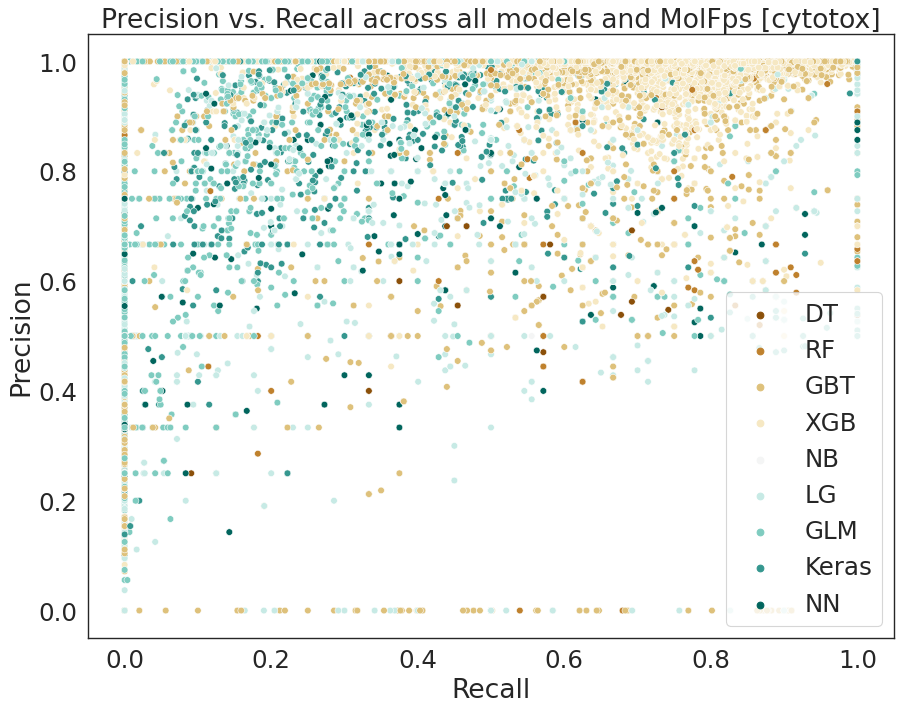

In [13]:
sns.set(font_scale = 2)
sns.set_style("white")
rc = {'figure.figsize':(20,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      'font.family':'Times New Roman',
      'font.size' : 22}
plt.rcParams.update(rc)
plt.figure(figsize=(13,10), dpi= 80)
sns.set_style("white")
hue_order = ["DecisionTree", "RandomForest", "GradientBoostedTrees", "XGBoostTrees", "NaiveBayes", "LogisticRegression",
            "GeneralizedLinearModel(H2O)", "DeepLearning(Keras)",  "NeuralNetwork"]
ax = sns.scatterplot(data=cyto, x="Recall", y="Precision",
                hue="Model", palette="BrBG", 
               hue_order=hue_order, linewidth=0.5, alpha = 1)
handles, labels  =  ax.get_legend_handles_labels() 
ax.legend(handles, ["DT", "RF", "GBT", "XGB", "NB", "LG", "GLM", "Keras", "NN"], loc='lower right')
ax.set_title('Precision vs. Recall across all models and MolFps [cytotox]')
plt.savefig('../plots/knime/scatter_combined_recall-vs-precision_hue-model.svg', bbox_inches = 'tight')

<Figure size 1040x800 with 0 Axes>

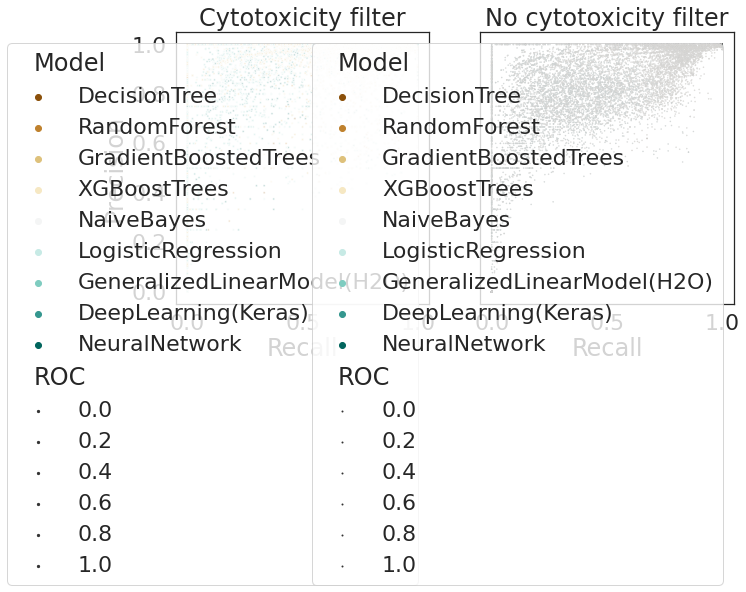

In [14]:
plt.figure(figsize=(13,10), dpi= 80)
hue_order = ["DecisionTree", "RandomForest", "GradientBoostedTrees", "XGBoostTrees", "NaiveBayes", "LogisticRegression",
            "GeneralizedLinearModel(H2O)", "DeepLearning(Keras)",  "NeuralNetwork"]
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.scatterplot(ax=axes[0], data=cyto, x="Recall", y="Precision",
                hue="Model", palette="BrBG", 
               hue_order=hue_order, linewidth=0.5, size="ROC", sizes=(5,5), alpha = 1)
axes[0].set_title("Cytotoxicity filter")
sns.scatterplot(ax=axes[1], data=nocyto, x="Recall", y="Precision",
                hue="Model", palette="BrBG", 
               hue_order=hue_order, edgecolor = "black", linewidth=0.5, size="ROC", sizes=(1,1), alpha = 0.75)
axes[1].set_title("No cytotoxicity filter")
plt.savefig('../plots/knime/scatter_combined_recall-vs-precision_hue-model_size-ROC.svg', bbox_inches = 'tight')

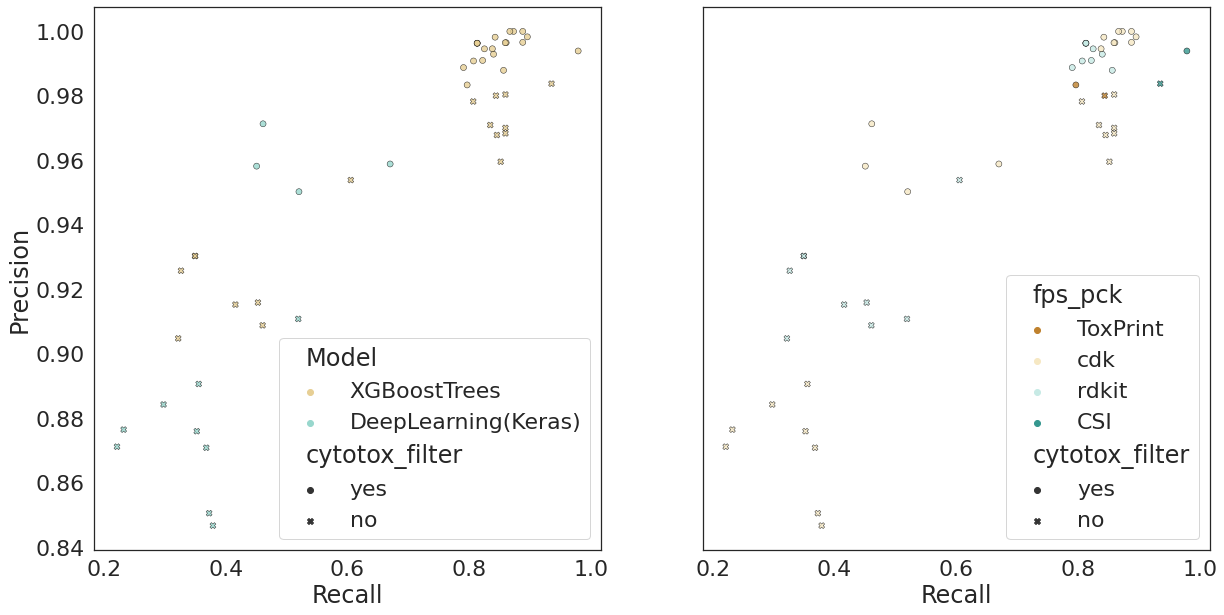

In [15]:
sns.set(font_scale = 2)
sns.set_style("white")
rc = {'figure.figsize':(20,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      #'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)

c891 = combined_data["class"] == "class891"
c609 = combined_data["class"] == "class609"
data_end = combined_data[c891 | c609]
data_end.shape
data_end.head()

class891 = data_end[data_end["class"] == "class891"]
class891.head(75)
class891.shape

class609 = data_end[data_end["class"] == "class609"]
class609.head(50)
class609.shape

hue_order = ["XGBoostTrees", "DeepLearning(Keras)"]
hue_order_fps = ["Avalon",  "Atompair", "ECFP0",  "ECFP2", "ECFP4", "ECFP6", "EState", "Extended", "FCFP0", "FCFP2", "FCFP4", "FCFP6", "FeatMorgan", 
                  "Morgan", "MACCS",  "Layered", "Pattern",  "Pubchem", "RDkit",  "Standard", "Torsion", "ToxPrint", "CSI"]
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
sns.scatterplot(ax=axes[0], data=class891, x="Recall", y="Precision",
                hue="Model", palette="BrBG", 
               hue_order=hue_order, edgecolor = "black", linewidth=0.5, style = "cytotox_filter", alpha = 0.80)
sns.scatterplot(ax=axes[1], data=class891, x="Recall", y="Precision",
                hue="fps_pck", palette="BrBG", 
                edgecolor = "black", linewidth=0.5, style="cytotox_filter",  alpha = 0.80)
plt.savefig('../plots/knime/class891-class609_scatter.svg', bbox_inches = 'tight')


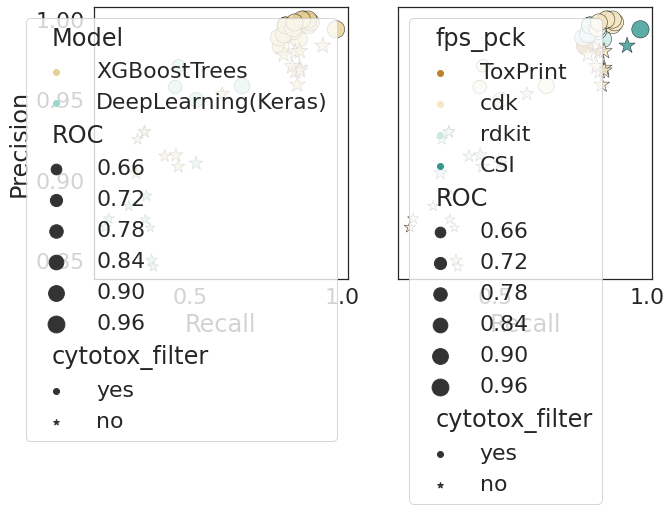

In [37]:
sns.set(font_scale = 2)
sns.set_style("white")
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      #'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)

c891 = combined_data["class"] == "class891"
c609 = combined_data["class"] == "class609"
data_end = combined_data[c891 | c609]
data_end.shape
data_end.head()

class891 = data_end[data_end["class"] == "class891"]
class891.head(75)
class891.shape

class609 = data_end[data_end["class"] == "class609"]
class609.head(50)
class609.shape
markers = ["o", "s", "D", "*"]
marker = ["o", "*"]

hue_order = ["XGBoostTrees", "DeepLearning(Keras)"]
hue_order_fps = ["Avalon",  "Atompair", "ECFP0",  "ECFP2", "ECFP4", "ECFP6", "EState", "Extended", "FCFP0", "FCFP2", "FCFP4", "FCFP6", "FeatMorgan", 
                  "Morgan", "MACCS",  "Layered", "Pattern",  "Pubchem", "RDkit",  "Standard", "Torsion", "ToxPrint", "CSI"]

fig, axes = plt.subplots(1, 2, sharey=True)
sns.scatterplot(ax=axes[0], data=class891, x="Recall", y="Precision",
                hue="Model", palette="BrBG",
               hue_order=hue_order, edgecolor = "black", linewidth=0.5, style = "cytotox_filter", markers = marker,
                size = "ROC", sizes=(100,300), alpha = 0.80)
sns.scatterplot(ax=axes[1], data=class891, x="Recall", y="Precision",
                hue="fps_pck", palette="BrBG",
                edgecolor = "black", linewidth=0.5, style="cytotox_filter", size = "ROC", markers = marker, 
                sizes=(100,300), alpha = 0.80)
fig.savefig('../plots/knime/class891-class609_scatter.svg', bbox_inches='tight', dpi=300)



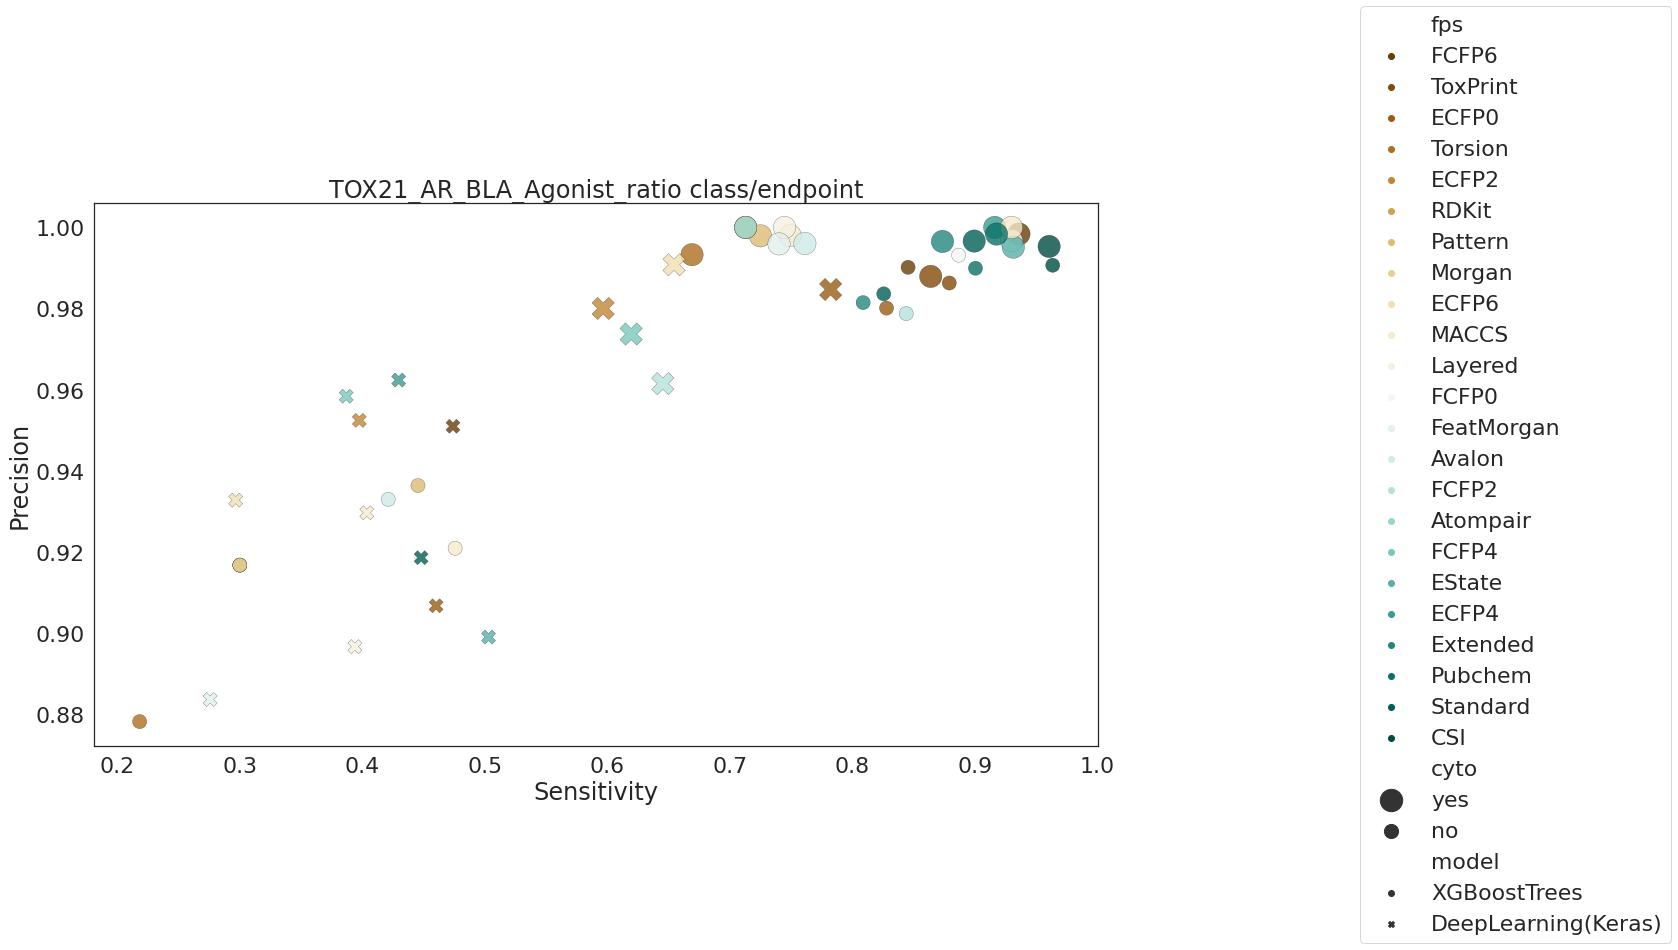

In [16]:
df = pd.read_csv("../data/knime-data/knime_res_class893_aeid761_20220405.csv")
df.head()

#print(df)
hue_order = ["XGBoostTrees", "DeepLearning(Keras)"]
hue_order_fps = ["Avalon",  "Atompair", "ECFP0",  "ECFP2", "ECFP4", "ECFP6", "EState", "Extended", "FCFP0", "FCFP2", "FCFP4", "FCFP6", "FeatMorgan", 
                  "Morgan", "MACCS",  "Layered", "Pattern",  "Pubchem", "RDkit",  "Standard", "Torsion", "ToxPrint", "CSI"]
sns.set(font_scale = 2)
sns.set_style("white")
rc = {'figure.figsize':(18,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      #'font.family':'Times New Roman',
      'font.size' : 22}
plt.rcParams.update(rc)
a = sns.scatterplot(data=df, x="Sensitivity", y="Precision",
                hue="fps", palette="BrBG", 
                edgecolor = "black", linewidth=0.25, style="model", size = "cyto", sizes=(200,500), alpha = 0.80, s = 150)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
a.set_title("TOX21_AR_BLA_Agonist_ratio class/endpoint")
plt.savefig('../plots/knime/class893_scatter.svg', dpi=600, bbox_inches = 'tight')
plt.show()

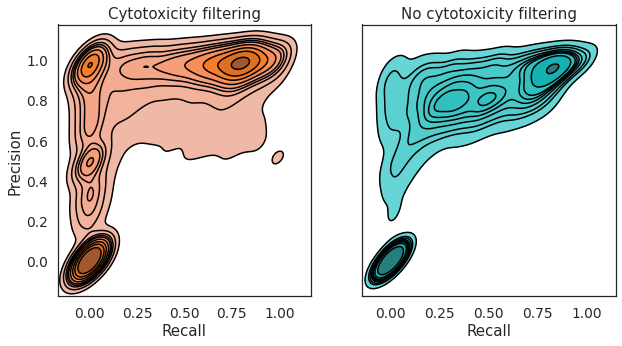

In [17]:
sns.set(font_scale = 1.25)
sns.set_style("white")
rc = {'figure.figsize':(20,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      #'font.family':'Times New Roman',
      'font.size' : 20}
plt.rcParams.update(rc)
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.kdeplot(ax = axes[0], data=cyto, x="Recall", y="Precision", legend = False,
            bw_adjust = 0.75, shade=True, color = "chocolate")
sns.kdeplot(ax = axes[0], data=cyto, x="Recall", y="Precision", legend = False,
            bw_adjust = 0.75, color = "black")
axes[0].set_title("Cytotoxicity filtering")
sns.kdeplot(ax = axes[1], data=nocyto, x="Recall", y="Precision", legend = False,
                bw_adjust = 0.75, shade=True, color = "darkcyan")
sns.kdeplot(ax = axes[1], data=nocyto, x="Recall", y="Precision", legend = False,
                bw_adjust = 0.75, color = "black")
axes[1].set_title("No cytotoxicity filtering")
plt.savefig('../plots/knime/kde_combined_recall-vs-precision_cytotoxnocytotox.svg', bbox_inches = 'tight')
# plt.savefig("Scatterplot_seaborn_edgecolor_linewidth.png",
#             format='png',dpi=150)

In [ ]:
palette_BrBG = sns.color_palette("BrBG", 10)
color1 = sns.color_palette([palette_BrBG[0]])
np.array(palette_BrBG[7])*255
customPalette1 = sns.set_palette(sns.color_palette(color1))
sns.color_palette("BrBG", 10)

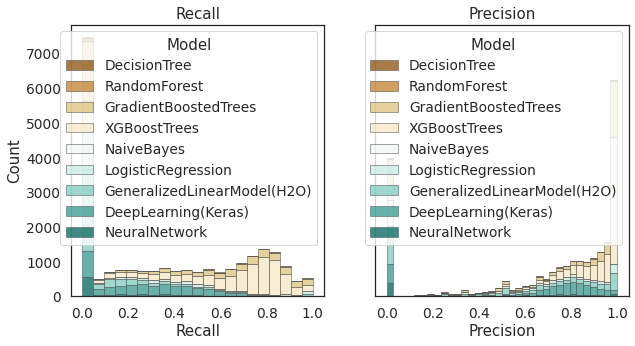

In [18]:
# here we use histograms to show the additional information of frequnecy, since the data is
# showing winning models, i.e., the more frequent the model, the more times it was the best outcome. 

hue_order = ["DecisionTree", "RandomForest", "GradientBoostedTrees", "XGBoostTrees", "NaiveBayes", "LogisticRegression",
            "GeneralizedLinearModel(H2O)", "DeepLearning(Keras)",  "NeuralNetwork"]

sns.set(font_scale = 1.25)
sns.set_style("white")
rc = {'figure.figsize':(10,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      #'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.histplot(ax=axes[0], multiple="stack", data=combined_data, x="Recall", hue="Model",
             hue_order=hue_order, palette = "BrBG", edgecolor=".3", 
             linewidth=.5)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
axes[0].set_title("Recall")
sns.histplot(ax=axes[1], multiple="stack", data=combined_data, x="Precision", hue="Model",
             hue_order=hue_order, palette = "BrBG", edgecolor=".3", 
             linewidth=.5)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
axes[1].set_title("Precision")
plt.savefig('../plots/knime/hist_combined_recall-and-precision_hue-model.svg')

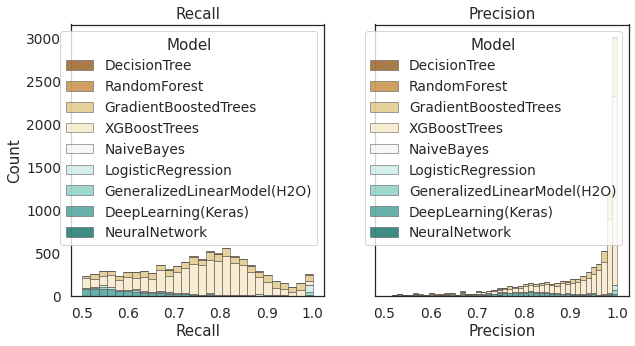

In [19]:
# here we use histograms to show the additional information of frequnecy, since the data is
# showing winning models, i.e., the more frequent the model, the more times it was the best outcome. 
hue_order = [ "DecisionTree", "RandomForest", "GradientBoostedTrees", "XGBoostTrees", "NaiveBayes", "LogisticRegression",
            "GeneralizedLinearModel(H2O)", "DeepLearning(Keras)",  "NeuralNetwork"]
sns.set(font_scale = 1.25)
sns.set_style("white")
rc = {'figure.figsize':(10,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      #'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)
recallcon = combined_data["Recall"] > 0.5
preccon = combined_data["Precision"] > 0.5
datafilt = combined_data[recallcon & preccon]
datafilt.shape
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.histplot(ax=axes[0], multiple="stack", data=datafilt, x="Recall", hue="Model",
             hue_order=hue_order, palette = "BrBG", edgecolor=".3", 
             linewidth=.5)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
axes[0].set_title("Recall")
sns.histplot(ax=axes[1], multiple="stack", data=datafilt, x="Precision", hue="Model",
             hue_order=hue_order, palette = "BrBG", edgecolor=".3", 
             linewidth=.5)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
axes[1].set_title("Precision")
plt.savefig('../plots/knime/hist_filtered_recall-and-precision_hue-model.svg')

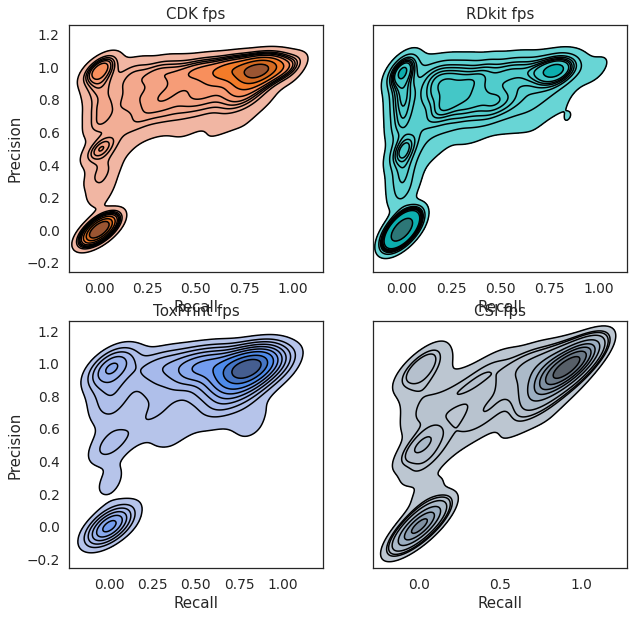

In [20]:
sns.set(font_scale = 1.25)
sns.set_style("white")
rc = {'figure.figsize':(10,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      #'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)
cdk = combined_data[combined_data.fps_pck=="cdk"]
rdkit = combined_data[combined_data.fps_pck=="rdkit"]
toxprint = combined_data[combined_data.fps_pck=="ToxPrint"]
csi = combined_data[combined_data.fps_pck=="CSI"]
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
sns.kdeplot(ax = axes[0,0], data=cdk, x="Recall", y="Precision", legend = False,
            bw_adjust = 0.75, shade=True, color = "chocolate")
sns.kdeplot(ax = axes[0,0], data=cdk, x="Recall", y="Precision", legend = False,
            bw_adjust = 0.75, color = "black")
axes[0,0].set_title("CDK fps")
sns.kdeplot(ax = axes[0,1], data=rdkit, x="Recall", y="Precision", legend = False,
            bw_adjust = 0.75, shade=True, color = "darkcyan")
sns.kdeplot(ax = axes[0,1], data=rdkit, x="Recall", y="Precision", legend = False,
            bw_adjust = 0.75, color = "black")
axes[0,1].set_title("RDkit fps")
sns.kdeplot(ax = axes[1,0], data=toxprint, x="Recall", y="Precision", legend = False,
            bw_adjust = 0.75, shade=True, color = "cornflowerblue")
sns.kdeplot(ax = axes[1,0], data=toxprint, x="Recall", y="Precision", legend = False,
            bw_adjust = 0.75, color = "black")
axes[1,0].set_title("ToxPrint fps")
sns.kdeplot(ax = axes[1,1], data=csi, x="Recall", y="Precision", legend = False,
            bw_adjust = 0.75, shade=True, color = "slategray")
sns.kdeplot(ax = axes[1,1], data=csi, x="Recall", y="Precision", legend = False,
            bw_adjust = 0.75, color = "black")
axes[1,1].set_title("CSI fps")

plt.savefig('../plots/knime/kde_combined_recall-vs-precision_fps-groups.svg')
# plt.savefig("Scatterplot_seaborn_edgecolor_linewidth.png",
#             format='png',dpi=150)

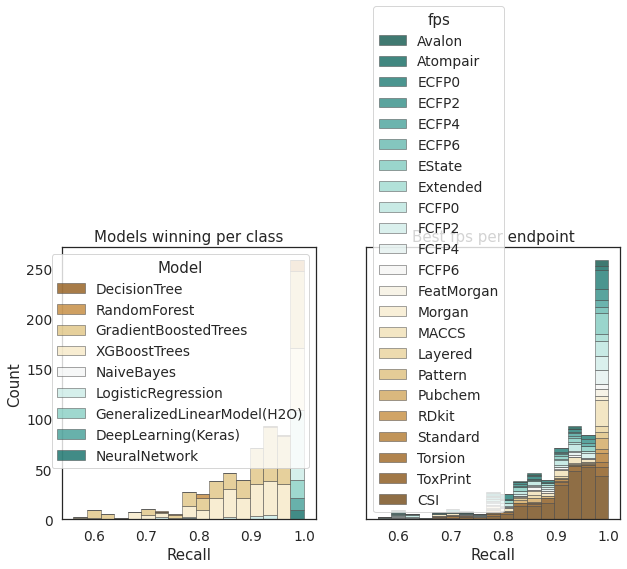

In [21]:
idx = combined_data.groupby(["class"])['Recall'].transform(max) == combined_data['Recall']
filtered_data = combined_data[idx]
#print(filtered_data)
filtered_data.shape
combined_data.shape
combined_data.groupby('class').count()

hue_order_model = [ "DecisionTree", "RandomForest", "GradientBoostedTrees", "XGBoostTrees", "NaiveBayes", "LogisticRegression",
            "GeneralizedLinearModel(H2O)", "DeepLearning(Keras)",  "NeuralNetwork"]
hue_order_fps = ["Avalon",  "Atompair", "ECFP0",  "ECFP2", "ECFP4", "ECFP6", "EState", "Extended", "FCFP0", "FCFP2", "FCFP4", "FCFP6", "FeatMorgan", 
                  "Morgan", "MACCS",  "Layered", "Pattern",  "Pubchem", "RDkit",  "Standard", "Torsion", "ToxPrint", "CSI"]
sns.set(font_scale = 1.25)
sns.set_style("white")
rc = {'figure.figsize':(10,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
     # 'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)
recallcon = filtered_data["Recall"] > 0.5
cohencon = filtered_data["Cohen_k"] > 0.5
datafilfil = filtered_data[recallcon & cohencon]

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.histplot(ax=axes[0], multiple="stack", log_scale=False, edgecolor=".3", 
             linewidth=.5, data=datafilfil, x="Recall", hue="Model", palette = "BrBG", hue_order = hue_order_model)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
axes[0].set_title("Models winning per class")
sns.histplot(ax=axes[1], multiple="stack", log_scale=False, edgecolor=".3", 
             linewidth=.5, data=datafilfil, x="Recall", hue="fps", palette = "BrBG_r", hue_order = hue_order_fps)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
axes[1].set_title("Best fps per endpoint")
plt.savefig('../plots/knime/hist_recall_filtered_bestperendpoint_hue-model-fps.svg')

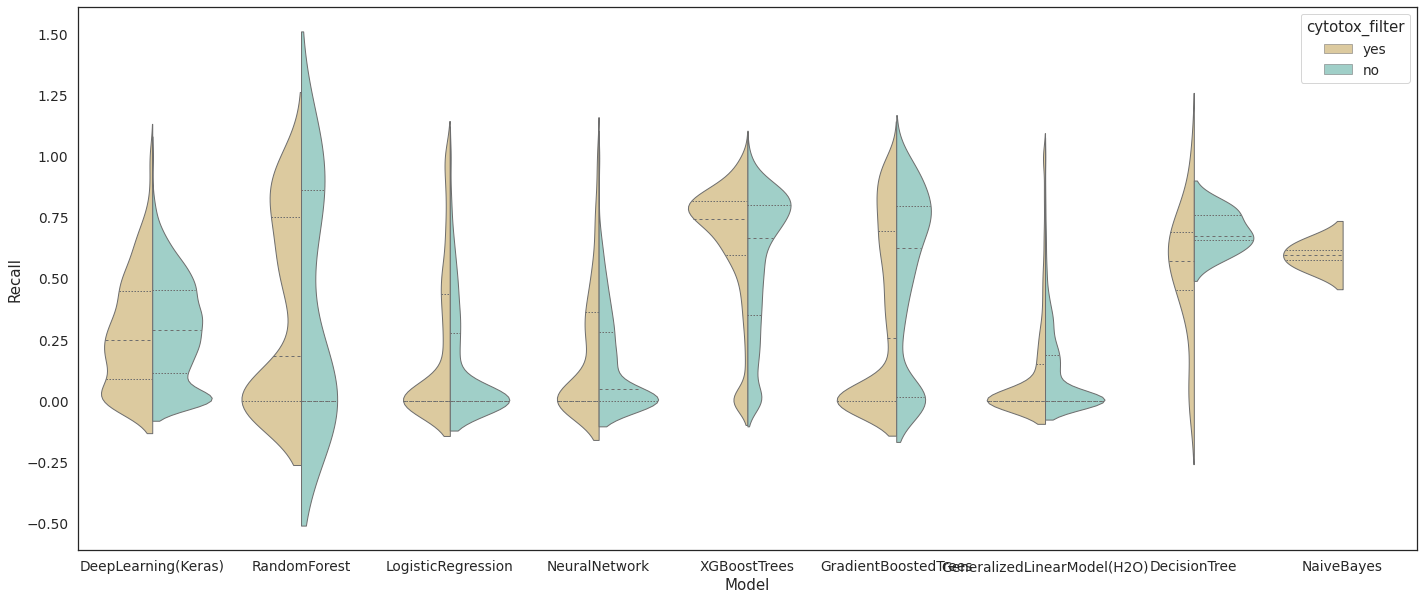

In [22]:
sns.set(font_scale = 1.25)
sns.set_style("white")
rc = {'figure.figsize':(24,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
      #'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)

csicon = combined_data["fps_pck"] == "CSI"
modcon = combined_data["Model"] == "XGBoostTrees"
datacsifil = combined_data[csicon & modcon]
datacsifil.shape


sns.set_context({"figure.figsize": (24, 10)})
sns.violinplot(data=combined_data, x="Model", y="Recall", hue="cytotox_filter",
               split=True, inner="quart", linewidth=1,
               palette="BrBG")

plt.savefig('../plots/knime/violin_combined_csifps_recall_hue-model.png')

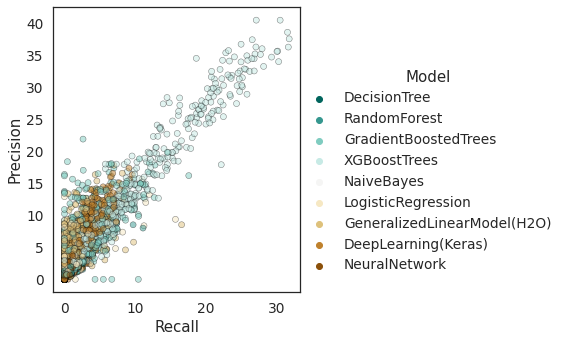

In [23]:
grouping = combined_data.groupby(['class','Model']).sum()
#$print(grouping)
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
     # 'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)
hue_order_model = [ "DecisionTree", "RandomForest", "GradientBoostedTrees", "XGBoostTrees", "NaiveBayes", "LogisticRegression",
            "GeneralizedLinearModel(H2O)", "DeepLearning(Keras)",  "NeuralNetwork"]

sns.set_context({"figure.figsize": (24, 10)})
sns.set(font_scale = 1.25)
sns.set_style("white")
sns.relplot(x="Recall", y="Precision", hue = "Model", alpha=.5, data=grouping, palette = "BrBG_r", hue_order = hue_order_model, 
           edgecolor = "black", linewidth=0.5,)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.savefig('../plots/knime/relplot_combined_recall-vs-precisiony_hue-model.svg')

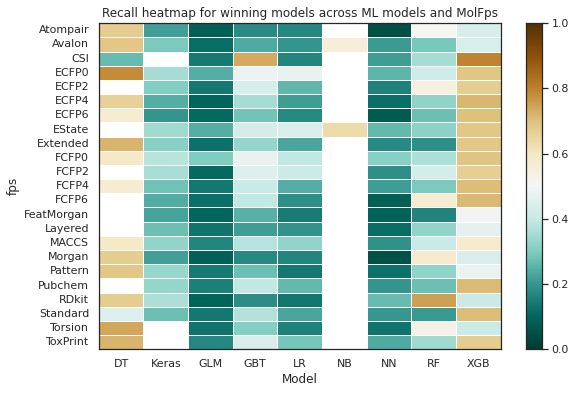

In [24]:
sns.set(font_scale = 2)
sns.set_theme()
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
     # 'font.family':'Times New Roman',
      'font.size' : 22}
plt.rcParams.update(rc)
sns.set_style("white")
df = combined_data[["class", "Model", "fps", "Recall"]]
grouped = df.groupby(["Model", "fps"],as_index=False)["Recall"].mean().pivot("fps", "Model", "Recall")
#grouped.shape
#type(grouped)
#print(grouped)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(grouped, linewidths=.5, ax=ax, cmap="BrBG_r", vmin=0, vmax=1, xticklabels=["DT", "Keras", "GLM", "GBT", "LR", "NB", "NN", "RF", "XGB"])
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
ax.set_title('Recall heatmap for winning models across ML models and MolFps')
plt.savefig('../plots/knime/heatmap_comb-model-vs-fps.svg', bbox_inches = 'tight')

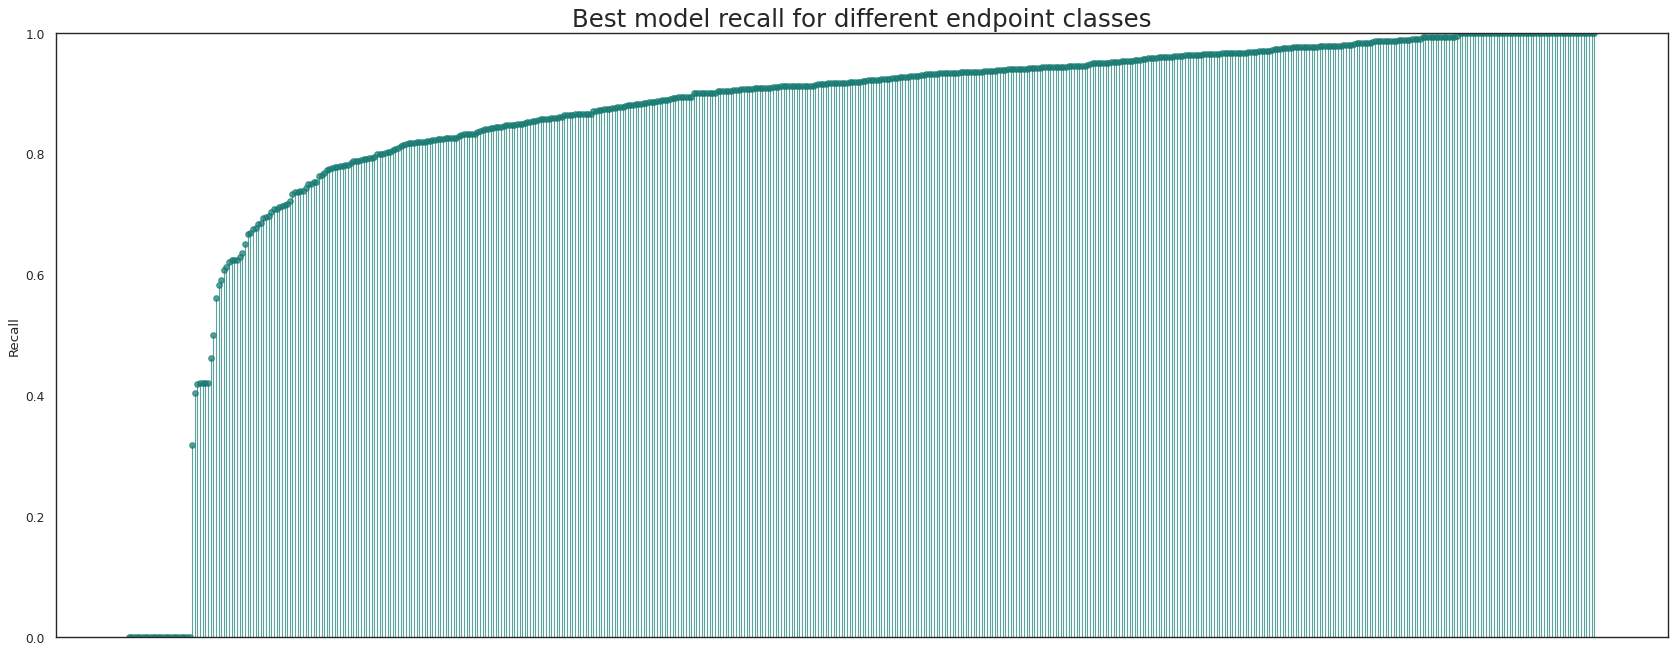

In [29]:
font = {'size' : 22}
sns.set_style("white")
mpl.rc('font', **font)
fig, ax = plt.subplots(figsize=(26,10), dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.Sensitivity, color='#167a72', alpha=0.7, linewidth=1)
ax.scatter(x=df.index, y=df.Sensitivity, s=25, color='#167a72', alpha=0.7)
ax.set_title('Best model recall for different endpoint classes', fontdict={'size':22})
ax.set_ylabel('Recall')
ax.set_xticks(df.index)
ax.set_xticklabels([])
ax.set_ylim(0, 1)
plt.savefig('../plots/knime/bestmodelrecalforclass.svg',bbox_inches = 'tight')

In [27]:
df.head()

,class,Model,fps,Recall
0,class107,DeepLearning(Keras),ECFP0,0.27
1,class132,RandomForest,ECFP0,1.00
2,class134,LogisticRegression,ECFP0,0.78
3,class139,DeepLearning(Keras),ECFP0,0.20
4,class140,NeuralNetwork,ECFP0,0.38


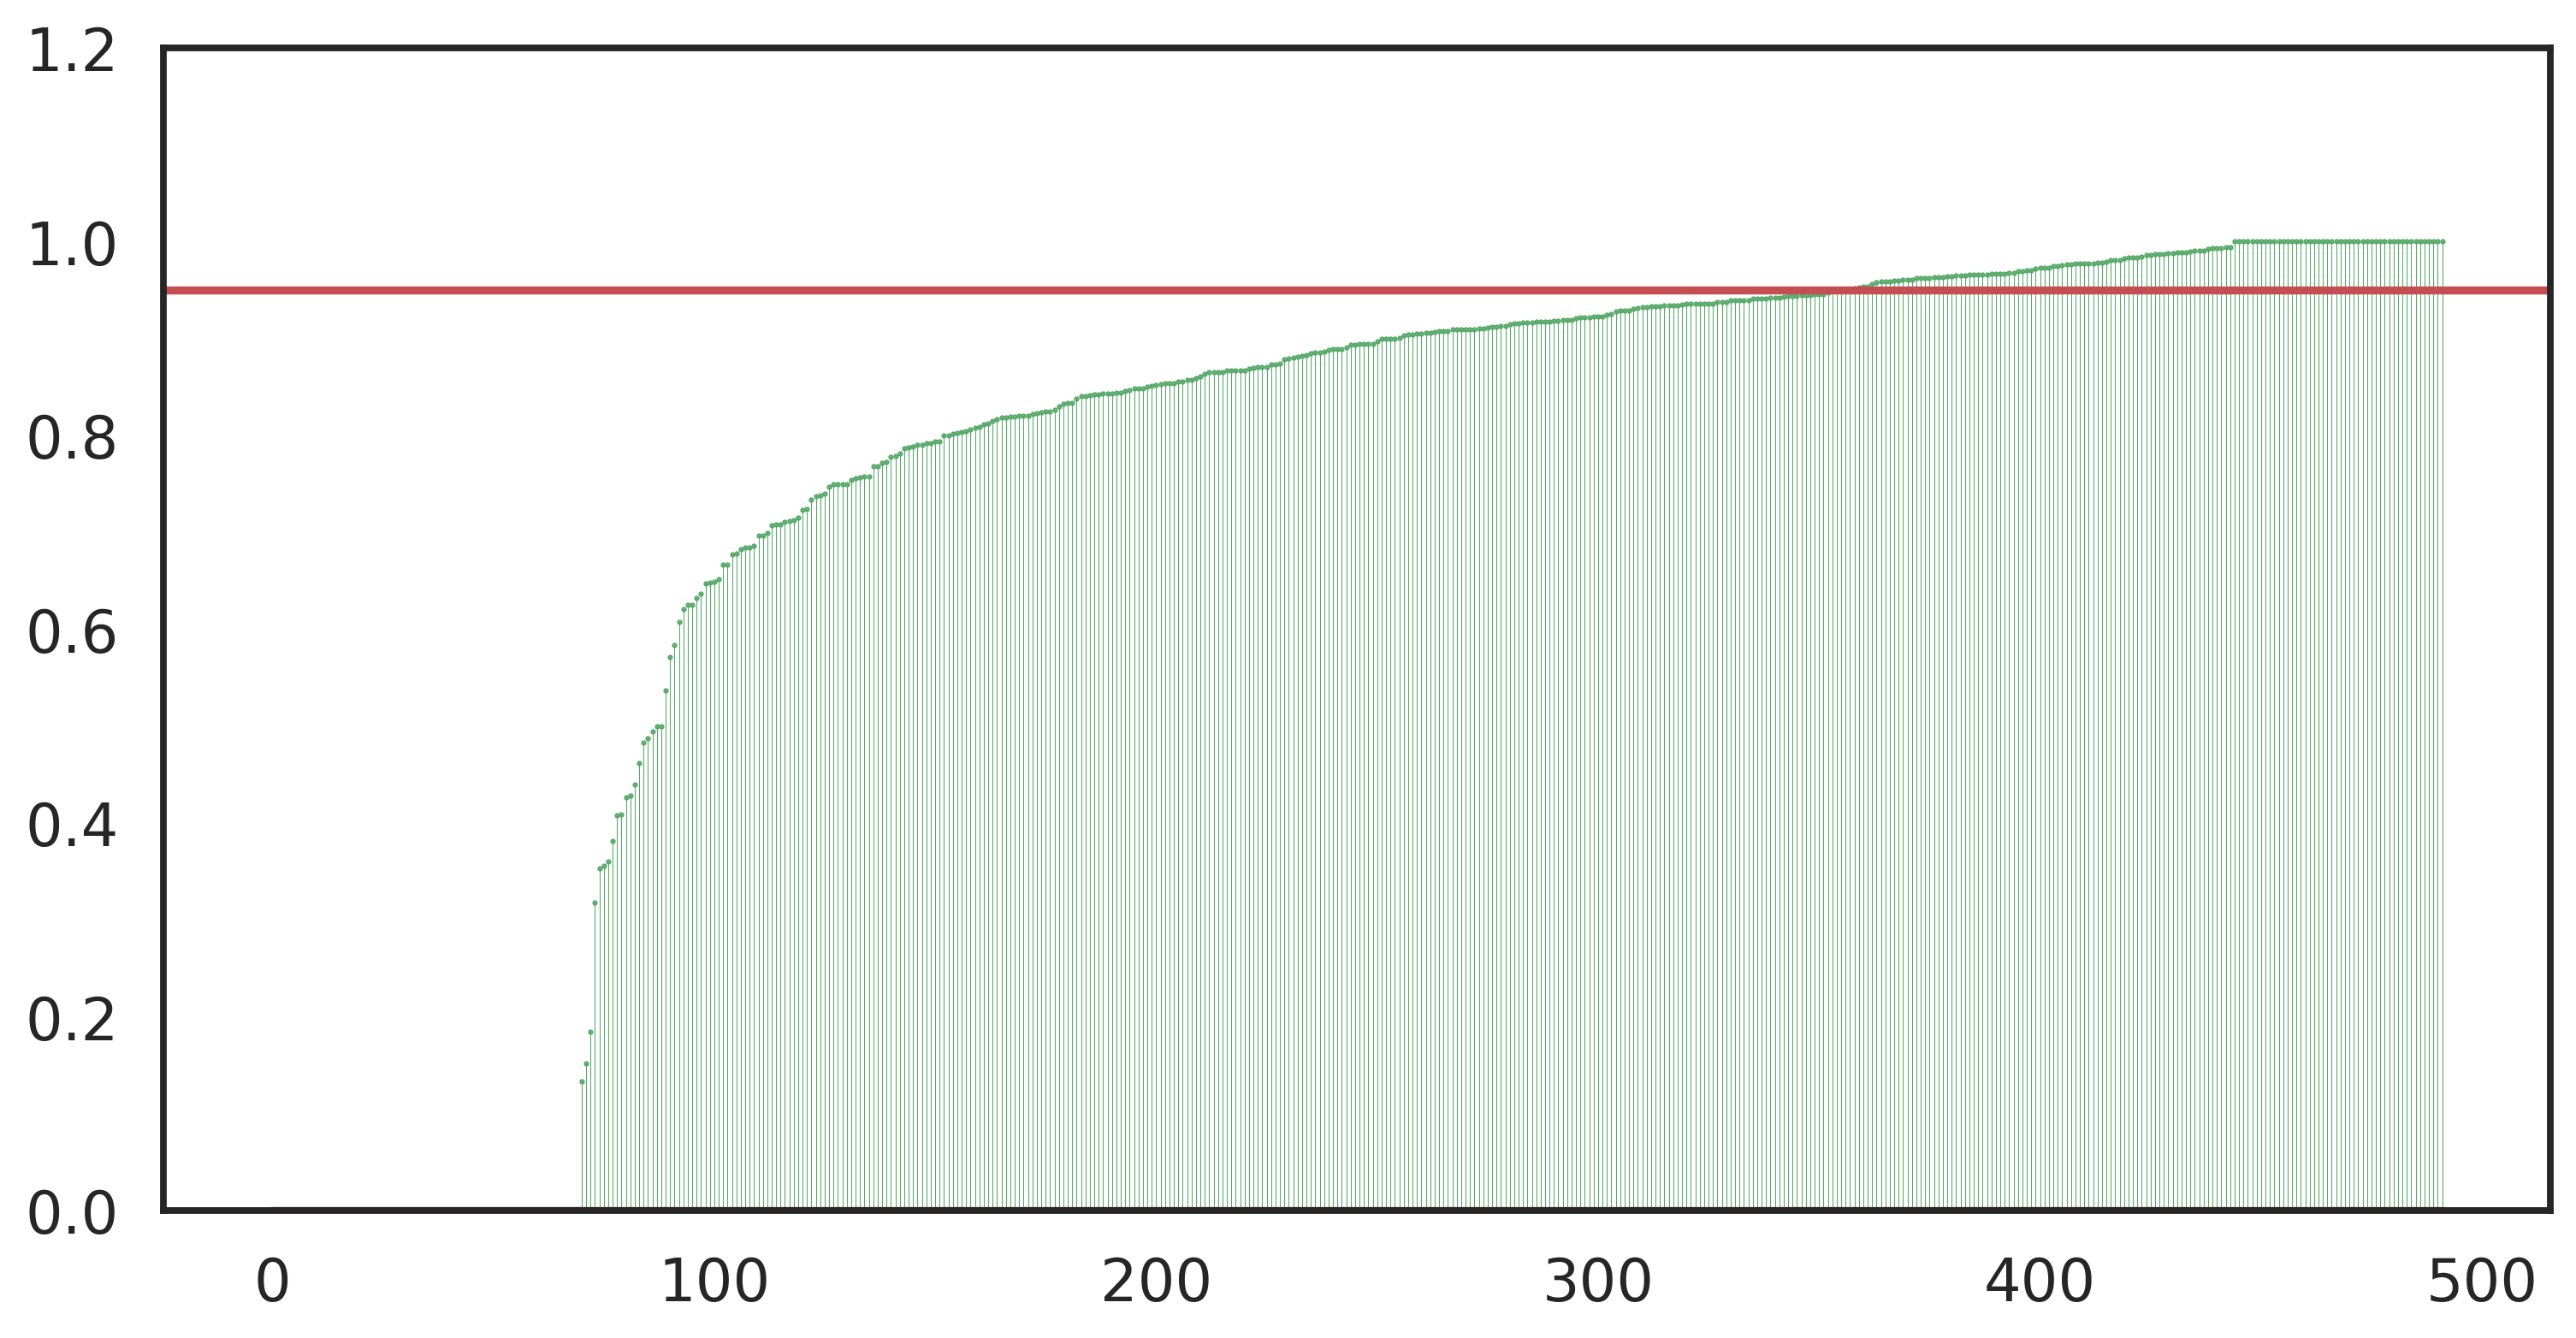

In [32]:
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# create data
plt.figure(figsize=(12, 6), dpi = 300)
# stem function
markerline, stemlines, baseline = plt.stem(df_class_targets["Recall"])
plt.axhline(y = 0.95, color = 'r', linestyle = '-')
plt.setp(stemlines, color='g', linewidth=0.25)
plt.setp(markerline, color='g', markersize = 0.5)
sns.set_style("white")

plt.ylim(0, 1.2)
plt.savefig('../plots/knime/class_recall.svg', bbox_inches = 'tight')
#plt.show()

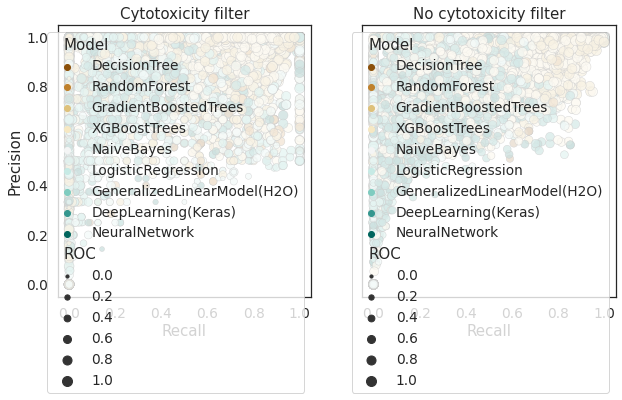

In [36]:
sns.set(font_scale = 1.25)
sns.set_style("white")
rc = {'figure.figsize':(10,10),
      'axes.facecolor':'white',
      'axes.grid' : False,
      'grid.color': '.8',
     # 'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)
hue_order = ["DecisionTree", "RandomForest", "GradientBoostedTrees", "XGBoostTrees", "NaiveBayes", "LogisticRegression",
            "GeneralizedLinearModel(H2O)", "DeepLearning(Keras)",  "NeuralNetwork"]
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.scatterplot(ax=axes[0], data=cyto, x="Recall", y="Precision",
                hue="Model", palette="BrBG", 
               hue_order=hue_order, edgecolor = "black", linewidth=0.5, size="ROC", sizes=(10,100), alpha = 0.75)
axes[0].set_title("Cytotoxicity filter")
sns.scatterplot(ax=axes[1], data=nocyto, x="Recall", y="Precision",
                hue="Model", palette="BrBG", 
               hue_order=hue_order, edgecolor = "black", linewidth=0.5, size="ROC", sizes=(10,100), alpha = 0.75)
axes[1].set_title("No cytotoxicity filter")
plt.savefig('../plots/knime/scatter_combined_recall-vs-precision_hue-model_size-ROC.svg', bbox_inches = 'tight')